KNN is a simple, easy-to-implement supervised machine learning to solve for classification and regression problems (real number as outcome). KNN model assumes that similar things exist in close proximity/distance. similar things are near to each other.

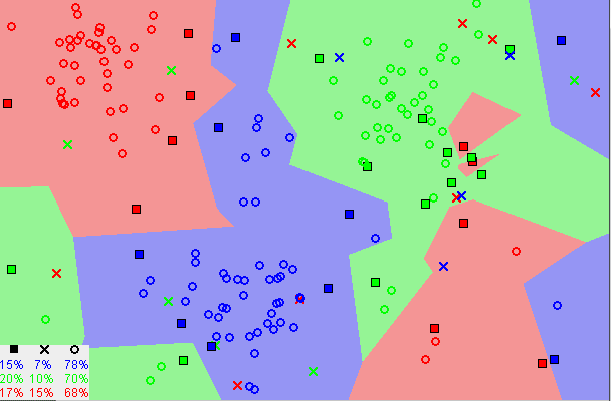


Choose K - number of nearest neighbours we want to analyze, which is sensitive to the model results
As a rule of thumb, we often use the square root of the number of observations.

we run the KNN algorithm several times with different values of K and choose the K that reduces the number of errors we encounter while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before

Consideration of choosing K
a. As we decrease the value of K to 1, our predictions become less stable; it will be influenced more by the immediate one neighbor

b.Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far.

c.In cases where we are taking a majority vote (e.g. picking the mode in a classification problem) among labels, we usually make K an odd number to have a tiebreaker.


Advantages
The algorithm is simple and easy to implement.
There’s no need to build a model, tune several parameters, or make additional assumptions.
The algorithm is versatile. It can be used for classification, regression, and search (as we will see in the next section).it works on linear and non-linear

Disadvantages
The algorithm gets significantly slower as the number of examples and/or predictors/independent variables increase.

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing,neighbors
from sklearn.model_selection import train_test_split


In [51]:
# Read & clean the data
data=pd.read_csv("listings.csv")
print(data.dtypes)

#data.describe()


#Drop ID fields, DROP NA field

print('-------before: ',data.shape)

data.drop(['id','host_id','name','host_name','license'], axis=1, inplace=True)

data.dropna(inplace=True)

print('-------after: ',data.shape)


# encoding string to catagorical 

#use dictionary and replace
mapping_field={'neighbourhood_group':{'Maui':'1','Honolulu':'2','Hawaii':'3','Kauai':'4'} }
data=data.replace(mapping_field)
data['neighbourhood_group'] =data['neighbourhood_group'].astype('category')

#use astype('category')
# .cat.codes
data['neighbourhood'] =data['neighbourhood'].astype('category').cat.codes
data['room_type'] =data['room_type'].astype('category').cat.codes


#code the data to be a catagorical inputs
data['revew_recently']=np.where(data['last_review']>='2021-11-01','1','0')
data['revew_recently'].astype('category')

data.drop('last_review', axis=1, inplace=True)
display(data.head())

data.info()

data['revew_recently'].value_counts()

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object
-------before:  (24294, 18)
-------after:  (19330, 13)


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,revew_recently
0,3,25,20.02740,-155.70200,0,149,3,16,0.12,2,193,6,0
1,3,26,19.43081,-155.88069,0,85,5,186,1.29,2,253,18,1
2,3,18,19.56604,-155.96199,0,299,6,32,0.33,2,189,12,0
3,4,19,22.22080,-159.46989,0,425,2,134,0.90,2,231,26,1
4,4,8,21.88139,-159.47248,2,140,3,206,1.54,4,120,27,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19330 entries, 0 to 24118
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   neighbourhood_group             19330 non-null  category
 1   neighbourhood                   19330 non-null  int8    
 2   latitude                        19330 non-null  float64 
 3   longitude                       19330 non-null  float64 
 4   room_type                       19330 non-null  int8    
 5   price                           19330 non-null  int64   
 6   minimum_nights                  19330 non-null  int64   
 7   number_of_reviews               19330 non-null  int64   
 8   reviews_per_month               19330 non-null  float64 
 9   calculated_host_listings_count  19330 non-null  int64   
 10  availability_365                19330 non-null  int64   
 11  number_of_reviews_ltm           19330 non-null  int64   
 12  revew_recently    

1    9893
0    9437
Name: revew_recently, dtype: int64

In [107]:
# data=pd.read_csv("listings.csv")
# print(data.dtypes)

# data.describe()

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.429400e+04,2.429400e+04,24294.000000,24294.000000,24294.000000,24294.000000,24294.000000,19330.000000,24294.000000,24294.000000,24294.000000
mean,3.368529e+07,1.199929e+08,20.912483,-157.175312,447.318597,6.428748,29.272742,1.142661,62.647073,190.491274,9.693505
std,1.559680e+07,1.181109e+08,0.772130,1.232824,1234.378582,16.953293,54.424986,1.238153,96.214132,110.709419,15.219455
min,5.269000e+03,9.080000e+02,18.920250,-159.714620,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.082409e+07,2.743939e+07,20.708020,-157.837410,153.000000,1.000000,1.000000,0.290000,2.000000,101.000000,0.000000
50%,3.633317e+07,8.715283e+07,20.959110,-156.689970,245.000000,3.000000,7.000000,0.740000,14.000000,213.000000,3.000000
75%,4.820457e+07,1.673542e+08,21.288097,-156.441722,400.000000,5.000000,32.000000,1.620000,83.000000,279.000000,13.000000
max,5.377440e+07,4.350678e+08,22.229279,-154.822930,25000.000000,1000.000000,878.000000,21.210000,439.000000,365.000000,388.000000


array([[<AxesSubplot:title={'center':'neighbourhood'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'room_type'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>],
       [<AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>,
        <AxesSubplot:title={'center':'calculated_host_listings_count'}>],
       [<AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:title={'center':'number_of_reviews_ltm'}>,
        <AxesSubplot:>]], dtype=object)

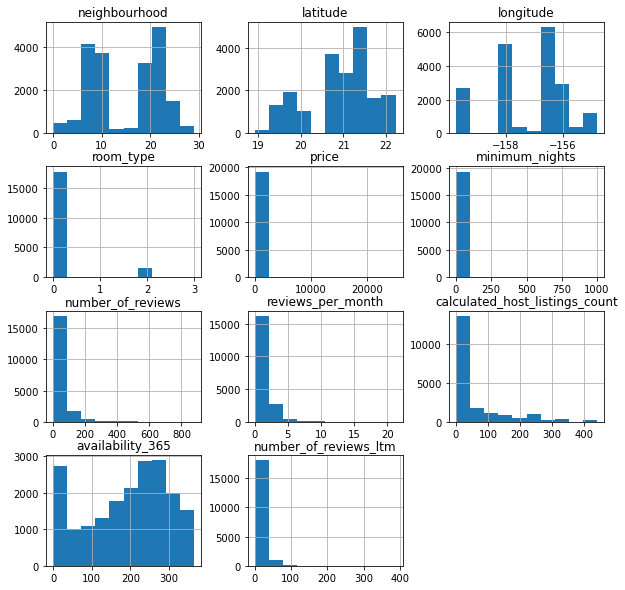

In [105]:
data.hist(bins=10, figsize=(10,10))

Accuracy:  0.715209518882566  with neigbors=  124
Accuracy:  0.7240041386445939  with default model setting


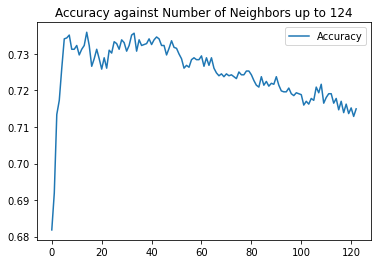

Best Accuracy:  0.7359027418520434


In [104]:
#label the data 

#Make a model to predict if the listing revieved a review recently

X=np.array(data.drop(['revew_recently'],axis=1))
y=np.array(data['revew_recently'])

#cross validation for 20% as testing data 
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

n=np.sqrt(len(X_train)).astype('int')

clf=neighbors.KNeighborsClassifier(n_neighbors=n)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print('Accuracy: ', accuracy, ' with neigbors= ',n )

#compare to defaul model setting 

clf2=neighbors.KNeighborsClassifier()
clf2.fit(X_train, y_train)

accuracy2 = clf2.score(X_test, y_test)
print('Accuracy: ', accuracy2, ' with default model setting')

#write a loop to calculate for the largest accuracy based 

# result=[]

# for i in range(1,n):
#         clf=neighbors.KNeighborsClassifier(n_neighbors=i)
#         clf.fit(X_train, y_train)
#         a=clf.score(X_test,y_test)
#         #print('accuracy: ', accuracy, ' with neigbors= ',n )
#         result.append(a)

plt.plot(result, label='Accuracy')
plt.title('Accuracy against Number of Neighbors up to 124')
# plt.ylabel('Y Axis')
# plt.yticks([1,2,3,4])
plt.legend(loc = 'best')
plt.show()

print('Best Accuracy: ',max(result))

In [103]:
print(result.index(max(result))+1)

clf3=neighbors.KNeighborsClassifier(n_neighbors=15)
clf3.fit(X_train, y_train)

accuracy3 = clf3.score(X_test, y_test)
print('Best Accuracy: ', accuracy3, ' Number of Neighbors up of :', result.index(max(result))+1)


15
Best Accuracy:  0.7379720641489912  Number of Neighbors up of : 15


In [108]:
#average accuracy rates over 25 times 

result2=[]

for i in range(1,25):
        clf=neighbors.KNeighborsClassifier(n_neighbors=i)
        clf.fit(X_train, y_train)
        accuracy=clf.score(X_test,y_test)
        #print('accuracy: ', accuracy, ' with neigbors= ',n )
        result2.append(accuracy)


print(sum(result2)/len(result2))

0.7181518365235385


In [129]:
# compare with a random forest model

from sklearn.ensemble import IsolationForest 

# Define and fit the model

random_state=np.random.RandomState(42)

model = IsolationForest(bootstrap=True,
                        n_estimators=100,       # 100 trees
                        max_samples='auto',     # if auto, use min 256 ot n_samples
                     #  contamination=float(0.2),  # percentage of outliers needed
                        random_state=random_state)   # define a random_state

model.fit(X_train, y_train)

print(model.get_params())

# Score the data and obtain the anomaly scores
# data['scores']=model.decision_function(X_train, y_train)
                                            
X_test_predicted=model.predict(X_test)
                                        
# print out the anomaly
print('predicted received comments: {}'.format(len(X_test_predicted[X_test_predicted==1])), ' out of: {}'.format(len(y_test)), ' {}'.format(len(X_test_predicted[X_test_predicted==1])/len(y_test)))



{'bootstrap': True, 'contamination': 'auto', 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x28CA84C5140, 'verbose': 0, 'warm_start': False}
predicted received comments: 3334  out of: 3866  0.8623900672529746


predicted received comments: 3334  out of: 3866  0.8623900672529746


In [123]:
\

array([['3', 24, 19.70063, ..., 1, 30, 25],
       ['2', 22, 21.27772, ..., 129, 295, 1],
       ['3', 26, 19.50105, ..., 3, 320, 0],
       ...,
       ['2', 22, 21.30878, ..., 2, 0, 3],
       ['1', 11, 20.8692, ..., 9, 144, 1],
       ['2', 2, 21.31377, ..., 1, 300, 5]], dtype=object)